# Import The Libraries

In [1]:
#import
import sys
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import pickle
from datetime import datetime as dt
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

# Read the data set for four months 

In [2]:
def get_data(week_nums,reset_index=True):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

#5-May,6-June,7-July,8-Aug
week_nums = [180505,180512,180519,180526,180602, 180609, 180616,180623,180630,180707,180714,180721,180728,180804,180811,180818,180825]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,00:00:00,REGULAR,6598847,2235829
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,04:00:00,REGULAR,6598864,2235830
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,08:00:00,REGULAR,6598880,2235863
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,12:00:00,REGULAR,6598961,2235955
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,04/28/2018,16:00:00,REGULAR,6599175,2236015


In [4]:
turnstiles_df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
141086,R190,R038,00-00-00,215 ST,1,IRT,08/21/2018,04:00:00,REGULAR,88411,15855
83877,N333B,R141,02-00-03,FOREST HILLS 71,EFMR,IND,05/25/2018,05:00:00,REGULAR,7940702,485776
62190,N120,R153,00-00-01,UTICA AV,AC,IND,06/12/2018,21:00:00,REGULAR,4933271,5793576
5346,A035,R170,00-00-02,14 ST-UNION SQ,LNQR456W,BMT,05/20/2018,01:00:00,REGULAR,341832,768446
146879,R221,R170,01-05-00,14 ST-UNION SQ,456LNQRW,IRT,07/23/2018,17:00:00,REGULAR,50337231,16777216


In [5]:
turnstiles_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,REGULAR,5554,348
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,REGULAR,5554,348
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,REGULAR,5554,348
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,REGULAR,5554,348
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,REGULAR,5554,348


In [6]:
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3344150 entries, 0 to 197379
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [7]:
turnstiles_df.dtypes

C/A                                                                     object
UNIT                                                                    object
SCP                                                                     object
STATION                                                                 object
LINENAME                                                                object
DIVISION                                                                object
DATE                                                                    object
TIME                                                                    object
DESC                                                                    object
ENTRIES                                                                  int64
EXITS                                                                    int64
dtype: object

In [8]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [9]:
turnstiles_df.shape

(3344150, 11)

# Cleaning data set

In [10]:
turnstiles_df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [11]:
turnstiles_df.columns=[columns.strip() for columns in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [12]:
# change to timeSerises and make it in one col called [DATE_TIME]
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

#drop duplicates 

In [13]:
turnstiles_df.sort_values(["C/A","UNIT","SCP","STATION","DATE_TIME"],inplace=True,ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A","UNIT","SCP","STATION","DATE_TIME"],inplace=True)

#count num of ENTRIES for each station

In [14]:
(turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
.ENTRIES.count()
.reset_index()
.sort_values("ENTRIES",ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-04-28 00:00:00,1
2229432,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-23 08:00:00,1
2229422,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 16:00:00,1
2229423,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 20:00:00,1
2229424,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-22 00:00:00,1


In [15]:
#count all ENTRIES 
turnstiles_df.ENTRIES.value_counts()

0             54185
1             22206
2             10303
3              7930
117440512      7865
              ...  
6680152           1
6657623           1
209963            1
1382397523        1
7978006           1
Name: ENTRIES, Length: 2404259, dtype: int64

In [16]:
(((turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .ENTRIES.count().reset_index()
              .sort_values("ENTRIES", ascending=False))["ENTRIES"]>1).sum())

0

#count num of EXITS for each station

In [17]:
(turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
.EXITS.count()
.reset_index()
.sort_values("EXITS",ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2018-04-28 00:00:00,1
2229432,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-23 08:00:00,1
2229422,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 16:00:00,1
2229423,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-21 20:00:00,1
2229424,R143,R032,02-03-02,TIMES SQ-42 ST,2018-05-22 00:00:00,1


In [18]:
#count all EXITS 
turnstiles_df.EXITS.value_counts()

0            126345
16777216       8553
65536          3508
3              2865
1              2378
              ...  
4085046           1
455228151         1
4101422           1
12498218          1
539911            1
Name: EXITS, Length: 2233159, dtype: int64

In [19]:
(((turnstiles_df.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .EXITS.count().reset_index()
              .sort_values("EXITS", ascending=False))["EXITS"]>1).sum())

0

In [20]:
turnstiles_df["C/A"].unique 

<bound method Series.unique of 197379    TRAM2
197378    TRAM2
197377    TRAM2
197376    TRAM2
197375    TRAM2
          ...  
4          A002
3          A002
2          A002
1          A002
0          A002
Name: C/A, Length: 3344142, dtype: object>

In [21]:
turnstiles_df["UNIT"].unique 

<bound method Series.unique of 197379    R469
197378    R469
197377    R469
197376    R469
197375    R469
          ... 
4         R051
3         R051
2         R051
1         R051
0         R051
Name: UNIT, Length: 3344142, dtype: object>

In [22]:
turnstiles_df["SCP"].unique 

<bound method Series.unique of 197379    00-05-01
197378    00-05-01
197377    00-05-01
197376    00-05-01
197375    00-05-01
            ...   
4         02-00-00
3         02-00-00
2         02-00-00
1         02-00-00
0         02-00-00
Name: SCP, Length: 3344142, dtype: object>

In [23]:
turnstiles_df["STATION"].unique 

<bound method Series.unique of 197379    RIT-ROOSEVELT
197378    RIT-ROOSEVELT
197377    RIT-ROOSEVELT
197376    RIT-ROOSEVELT
197375    RIT-ROOSEVELT
              ...      
4                 59 ST
3                 59 ST
2                 59 ST
1                 59 ST
0                 59 ST
Name: STATION, Length: 3344142, dtype: object>

In [24]:
turnstiles_df["LINENAME"].unique 

<bound method Series.unique of 197379          R
197378          R
197377          R
197376          R
197375          R
           ...   
4         NQR456W
3         NQR456W
2         NQR456W
1         NQR456W
0         NQR456W
Name: LINENAME, Length: 3344142, dtype: object>

In [25]:
turnstiles_df["DIVISION"].unique 

<bound method Series.unique of 197379    RIT
197378    RIT
197377    RIT
197376    RIT
197375    RIT
         ... 
4         BMT
3         BMT
2         BMT
1         BMT
0         BMT
Name: DIVISION, Length: 3344142, dtype: object>

In [26]:
turnstiles_df["DATE"].unique 

<bound method Series.unique of 197379    08/24/2018
197378    08/24/2018
197377    08/24/2018
197376    08/24/2018
197375    08/24/2018
             ...    
4         04/28/2018
3         04/28/2018
2         04/28/2018
1         04/28/2018
0         04/28/2018
Name: DATE, Length: 3344142, dtype: object>

In [27]:
turnstiles_df["TIME"].unique 

<bound method Series.unique of 197379    21:00:00
197378    17:00:00
197377    13:00:00
197376    09:00:00
197375    05:00:00
            ...   
4         16:00:00
3         12:00:00
2         08:00:00
1         04:00:00
0         00:00:00
Name: TIME, Length: 3344142, dtype: object>

In [28]:
turnstiles_df["DESC"].unique 

<bound method Series.unique of 197379    REGULAR
197378    REGULAR
197377    REGULAR
197376    REGULAR
197375    REGULAR
           ...   
4         REGULAR
3         REGULAR
2         REGULAR
1         REGULAR
0         REGULAR
Name: DESC, Length: 3344142, dtype: object>

In [29]:
turnstiles_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,ENTRIES,EXITS
count,3344142.0,3344142.0
mean,40132830.5,32838072.4
std,207698587.4,191028806.9
min,0.0,0.0
25%,504389.8,241736.0
50%,2527887.0,1437623.5
75%,6923465.8,4822224.2
max,2144892848.0,2146093333.0


In [30]:
turnstiles_df.DATE.value_counts().sort_index()

04/28/2018    28099
04/29/2018    28172
04/30/2018    28259
05/01/2018    28218
05/02/2018    28176
              ...  
08/20/2018    28254
08/21/2018    28095
08/22/2018    28647
08/23/2018    28726
08/24/2018    27952
Name: DATE, Length: 119, dtype: int64

In [31]:
# remove  the other month
mask=((turnstiles_df["DATE"]=="04/28/2018")|
      (turnstiles_df["DATE"]=="04/29/2018")|
      (turnstiles_df["DATE"]=="04/30/2018"))
turnstiles_df2=turnstiles_df[~mask]

In [32]:
turnstiles_df2.DATE.value_counts().sort_index()

05/01/2018    28218
05/02/2018    28176
05/03/2018    28186
05/04/2018    28092
05/05/2018    28093
              ...  
08/20/2018    28254
08/21/2018    28095
08/22/2018    28647
08/23/2018    28726
08/24/2018    27952
Name: DATE, Length: 116, dtype: int64

In [33]:
# Drop Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df2 = turnstiles_df2.drop(["DESC"], axis=1, errors="ignore")

In [34]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00


# ENTRIES

In [35]:
turnstiles_daily_ENTRIES = (turnstiles_df2
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.max())

In [36]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/01/2018,6603075
1,A002,R051,02-00-00,59 ST,05/02/2018,6604584
2,A002,R051,02-00-00,59 ST,05/03/2018,6606085
3,A002,R051,02-00-00,59 ST,05/04/2018,6607606
4,A002,R051,02-00-00,59 ST,05/05/2018,6608439


In [37]:
turnstiles_daily_ENTRIES[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_ENTRIES
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)));

<ipython-input-37-9a545905429f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_ENTRIES[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_ENTRIES


In [38]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,05/01/2018,6603075,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/02/2018,6604584,05/01/2018,6603075.0
2,A002,R051,02-00-00,59 ST,05/03/2018,6606085,05/02/2018,6604584.0
3,A002,R051,02-00-00,59 ST,05/04/2018,6607606,05/03/2018,6606085.0
4,A002,R051,02-00-00,59 ST,05/05/2018,6608439,05/04/2018,6607606.0


In [39]:
turnstiles_daily_ENTRIES[turnstiles_daily_ENTRIES["ENTRIES"] < turnstiles_daily_ENTRIES["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1137,A002,R051,02-05-00,59 ST,08/02/2018,1,08/01/2018,1565.0
2188,A006,R079,00-03-01,5 AV/59 ST,08/09/2018,2865,08/08/2018,2997549.0
3838,A010,R080,00-00-07,57 ST-7 AV,05/11/2018,7952,05/10/2018,29163426.0
3945,A011,R080,01-00-00,57 ST-7 AV,05/02/2018,885929955,05/01/2018,885930298.0
3946,A011,R080,01-00-00,57 ST-7 AV,05/03/2018,885929642,05/02/2018,885929955.0


In [40]:
# Drop null
turnstiles_daily_ENTRIES.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [41]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2018,6604584,05/01/2018,6603075.0
2,A002,R051,02-00-00,59 ST,05/03/2018,6606085,05/02/2018,6604584.0
3,A002,R051,02-00-00,59 ST,05/04/2018,6607606,05/03/2018,6606085.0
4,A002,R051,02-00-00,59 ST,05/05/2018,6608439,05/04/2018,6607606.0
5,A002,R051,02-00-00,59 ST,05/06/2018,6609035,05/05/2018,6608439.0


In [42]:
turnstiles_daily_ENTRIES.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
543433,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/20/2018,5554,08/19/2018,5554.0
543434,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/21/2018,5554,08/20/2018,5554.0
543435,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/22/2018,5554,08/21/2018,5554.0
543436,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/23/2018,5554,08/22/2018,5554.0
543437,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/24/2018,5554,08/23/2018,5554.0


In [43]:
(((turnstiles_df2.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .ENTRIES.count().reset_index()
              .sort_values("ENTRIES", ascending=False))["ENTRIES"]>1).sum())

0

In [44]:
# Check the counter being in reverse!
mask = ((turnstiles_df2["C/A"] == "A011") & 
(turnstiles_df2["UNIT"] == "R080") & 
(turnstiles_df2["SCP"] == "01-00-00") & 
(turnstiles_df2["STATION"] == "57 ST-7 AV") &
(turnstiles_df2["DATE_TIME"].dt.date == datetime.datetime(2018, 5,1).date()))
turnstiles_df2[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
1453,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,20:00:00,885929999,491498845,2018-05-01 20:00:00
1452,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,16:00:00,885930164,491499766,2018-05-01 16:00:00
1451,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,12:00:00,885930221,491500585,2018-05-01 12:00:00
1450,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,08:00:00,885930287,491502648,2018-05-01 08:00:00
1449,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,07:18:45,885930289,491502989,2018-05-01 07:18:45


Counter working in Reverse?

In [45]:
(turnstiles_daily_ENTRIES[turnstiles_daily_ENTRIES["ENTRIES"] < turnstiles_daily_ENTRIES["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-05-00  59 ST                1
A006   R079  00-03-01  5 AV/59 ST           1
A010   R080  00-00-07  57 ST-7 AV           1
A011   R080  01-00-00  57 ST-7 AV         115
A025   R023  01-03-01  34 ST-HERALD SQ    115
                                         ... 
R627   R063  00-03-01  SUTTER AV-RUTLD      1
R646   R110  01-00-01  FLATBUSH AV-B.C    115
R730   R431  00-00-04  EASTCHSTER/DYRE    111
S101A  R070  01-00-05  ST. GEORGE           1
TRAM1  R468  00-00-00  RIT-MANHATTAN        1
Length: 268, dtype: int64

In [46]:
def get_daily_counts_ENTRIES(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily_ENTRIES["DAILY_ENTRIES"]= turnstiles_daily_ENTRIES.apply(get_daily_counts_ENTRIES, axis=1, max_counter=1000000)

2865 2997549.0
7952 29163426.0
524514 1535945.0
917 1646681283.0
262 4111454.0
552547867 2106.0
2627 1813703.0
3584251 16809292.0
1884 5074202.0
50386730 254534.0
1414 50386730.0
459656 4365358.0
16824594 102581.0
1483 1949067.0
984 4451954.0
2491 2944492.0
1090 1071940.0
475 2411616.0
1442830408 11142329.0
1787 4709092.0
787 2479313.0
1114281 6565.0
2851 20220123.0
2447 11178676.0
1208002329 4781477.0
3794852 812844.0
138 3794871.0
1098 1149724.0
806 1320446.0
33604923 145084.0
33602425 158379.0
793 1122816.0
218572258 118342317.0
1493118270 10962985.0
44510194 1493041962.0
704645242 2782942.0
486 5890270.0
1282912405 3365.0
55 1282912405.0
397 1580082.0
2067430671 910999.0
2067447699 2242569.0
1352760 2067431097.0
5106851 1349247.0
8783009 4718825.0
1339 7015818.0
132015 151252604.0
9355 9652856.0
621072165 2251881.0
2253564 621072165.0
0 50331648.0
130 871938592.0
635 4648569.0
458796 67192668.0
716 1752712.0
117444532 136656341.0
521 1067077.0
1075352 909.0
2705659 364454.0
366081 

In [47]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2018,6604584,05/01/2018,6603075.0,1509.0
2,A002,R051,02-00-00,59 ST,05/03/2018,6606085,05/02/2018,6604584.0,1501.0
3,A002,R051,02-00-00,59 ST,05/04/2018,6607606,05/03/2018,6606085.0,1521.0
4,A002,R051,02-00-00,59 ST,05/05/2018,6608439,05/04/2018,6607606.0,833.0
5,A002,R051,02-00-00,59 ST,05/06/2018,6609035,05/05/2018,6608439.0,596.0


In [48]:
ca_unit_station_daily_ENTRIES = turnstiles_daily_ENTRIES.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily_ENTRIES.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,05/02/2018,13889.0
1,A002,R051,59 ST,05/03/2018,14138.0
2,A002,R051,59 ST,05/04/2018,13887.0
3,A002,R051,59 ST,05/05/2018,8275.0
4,A002,R051,59 ST,05/06/2018,6177.0


In [49]:
ca_unit_station_daily_ENTRIES.sample(5)

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
6424,B018,R184,CORTELYOU RD,08/09/2018,6143.0
48309,N604,R342,JAMAICA VAN WK,06/28/2018,4479.0
62029,R217A,R194,BLEECKER ST,08/07/2018,13993.0
4136,A061,R142,DELANCEY/ESSEX,08/21/2018,7887.0
59004,R179,R193,157 ST,07/03/2018,2206.0


In [50]:
ca_unit_station_daily_ENTRIES.tail()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
83750,TRAM2,R469,RIT-ROOSEVELT,08/20/2018,3435.0
83751,TRAM2,R469,RIT-ROOSEVELT,08/21/2018,3421.0
83752,TRAM2,R469,RIT-ROOSEVELT,08/22/2018,3551.0
83753,TRAM2,R469,RIT-ROOSEVELT,08/23/2018,3698.0
83754,TRAM2,R469,RIT-ROOSEVELT,08/24/2018,3608.0


In [51]:
station_daily_ENTRIES= turnstiles_daily_ENTRIES.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily_ENTRIES.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,05/02/2018,22845.0
1,1 AV,05/03/2018,23446.0
2,1 AV,05/04/2018,23623.0
3,1 AV,05/05/2018,20341.0
4,1 AV,05/06/2018,16569.0


# stations with the highest traffic 

In [52]:
station_totals_ENTRIES = station_daily_ENTRIES.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_ENTRIES.head(10)

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,16468566.0
1,GRD CNTRL-42 ST,15007425.0
2,34 ST-HERALD SQ,12781501.0
3,23 ST,10677540.0
4,TIMES SQ-42 ST,10669477.0
5,14 ST-UNION SQ,10645307.0
6,42 ST-PORT AUTH,10471811.0
7,FULTON ST,10467768.0
8,PATH NEW WTC,9448038.0
9,86 ST,8345939.0


In [53]:
single_turnstiles_ENTRIES=turnstiles_df2[(turnstiles_df2["C/A"] == "R142") & 
                                           (turnstiles_df2["SCP"] == "01-06-01") & 
                                           (turnstiles_df2["UNIT"] == "R293") & 
                                           (turnstiles_df2["STATION"] == "34 ST-PENN STA")]
single_turnstiles_ENTRIES.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
130891,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,22:00:00,67701040,17992217,2018-08-24 22:00:00
130890,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,18:00:00,67700869,17991931,2018-08-24 18:00:00
130889,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,14:00:00,67700602,17991534,2018-08-24 14:00:00
130888,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,10:00:00,67700434,17991174,2018-08-24 10:00:00
130887,R142,R293,01-06-01,34 ST-PENN STA,123ACE,IRT,08/24/2018,06:00:00,67700353,17990696,2018-08-24 06:00:00


In [54]:
station_daily_34=station_daily_ENTRIES[station_daily_ENTRIES['STATION']=='34 ST-PENN STA']
station_daily_34.head()

,STATION,DATE,DAILY_ENTRIES
6839,34 ST-PENN STA,05/02/2018,171533.0
6840,34 ST-PENN STA,05/03/2018,173752.0
6841,34 ST-PENN STA,05/04/2018,164674.0
6842,34 ST-PENN STA,05/05/2018,84397.0
6843,34 ST-PENN STA,05/06/2018,72190.0


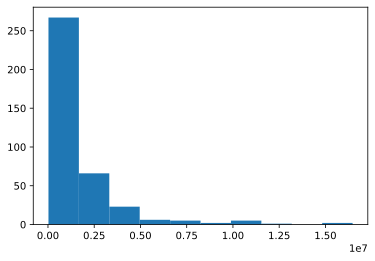

In [55]:
plt.hist(station_totals_ENTRIES['DAILY_ENTRIES']);

In [56]:
Top_10_station=station_totals_ENTRIES.head(10)
Top_10_station

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,16468566.0
1,GRD CNTRL-42 ST,15007425.0
2,34 ST-HERALD SQ,12781501.0
3,23 ST,10677540.0
4,TIMES SQ-42 ST,10669477.0
5,14 ST-UNION SQ,10645307.0
6,42 ST-PORT AUTH,10471811.0
7,FULTON ST,10467768.0
8,PATH NEW WTC,9448038.0
9,86 ST,8345939.0


In [ ]:
plt.hist(Top_10_station['DAILY_ENTRIES'], Top_10_station['STATION']);

In [58]:
station_daily_34['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34['DATE']).dt.dayofweek
station_daily_34['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34['DATE']).dt.week
station_daily_34.head()

<ipython-input-58-c5ec730fa97b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_34['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_34['DATE']).dt.dayofweek
<ipython-input-58-c5ec730fa97b>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_34['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_34['DATE']).dt.week
<ipython-input-58-c5ec730fa97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_da

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
6839,34 ST-PENN STA,05/02/2018,171533.0,2,18
6840,34 ST-PENN STA,05/03/2018,173752.0,3,18
6841,34 ST-PENN STA,05/04/2018,164674.0,4,18
6842,34 ST-PENN STA,05/05/2018,84397.0,5,18
6843,34 ST-PENN STA,05/06/2018,72190.0,6,18


Text(0.5, 1.0, 'Ridership per day for 34 ST-PENN STA station')

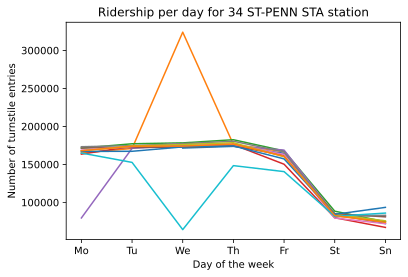

In [59]:
#x_4 =station_daily_57_av.groupby('WEEK_OF_YEAR').head(4)
for i, group in station_daily_34.groupby('WEEK_OF_YEAR'): 
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    if i == 29:
        break;
        
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 34 ST-PENN STA station')

In [60]:
top10_stations_ENTRIES = (station_daily_ENTRIES.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

In [61]:
station_daily_top10_ENTRIES = station_daily_ENTRIES[station_daily_ENTRIES['STATION']
                                    .isin(top10_stations_ENTRIES)].sort_values(by = 'DAILY_ENTRIES', ascending = False)

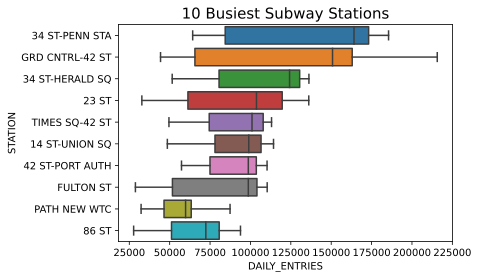

In [62]:
sns.boxplot(x='DAILY_ENTRIES', y='STATION', data=station_daily_top10_ENTRIES, order = top10_stations_ENTRIES, \
            showfliers = False).set_title('10 Busiest Subway Stations', size = 15);

# EXITS

In [63]:
turnstiles_daily_EXITS = (turnstiles_df2
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.max())

In [64]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS
0,A002,R051,02-00-00,59 ST,05/01/2018,2237383
1,A002,R051,02-00-00,59 ST,05/02/2018,2237940
2,A002,R051,02-00-00,59 ST,05/03/2018,2238518
3,A002,R051,02-00-00,59 ST,05/04/2018,2239018
4,A002,R051,02-00-00,59 ST,05/05/2018,2239267


In [65]:
turnstiles_daily_EXITS[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_EXITS
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)));

<ipython-input-65-d84b38e98a71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily_EXITS[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_EXITS


In [66]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,05/01/2018,2237383,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/02/2018,2237940,05/01/2018,2237383.0
2,A002,R051,02-00-00,59 ST,05/03/2018,2238518,05/02/2018,2237940.0
3,A002,R051,02-00-00,59 ST,05/04/2018,2239018,05/03/2018,2238518.0
4,A002,R051,02-00-00,59 ST,05/05/2018,2239267,05/04/2018,2239018.0


In [67]:
turnstiles_daily_EXITS[turnstiles_daily_EXITS["EXITS"] < turnstiles_daily_EXITS["PREV_EXITS"]].head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
2188,A006,R079,00-03-01,5 AV/59 ST,08/09/2018,1022,08/08/2018,1595642.0
3838,A010,R080,00-00-07,57 ST-7 AV,05/11/2018,692,05/10/2018,5839558.0
3945,A011,R080,01-00-00,57 ST-7 AV,05/02/2018,491498546,05/01/2018,491503410.0
3946,A011,R080,01-00-00,57 ST-7 AV,05/03/2018,491493421,05/02/2018,491498546.0
3947,A011,R080,01-00-00,57 ST-7 AV,05/04/2018,491488200,05/03/2018,491493421.0


In [68]:
# Drop null
turnstiles_daily_EXITS.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [69]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1,A002,R051,02-00-00,59 ST,05/02/2018,2237940,05/01/2018,2237383.0
2,A002,R051,02-00-00,59 ST,05/03/2018,2238518,05/02/2018,2237940.0
3,A002,R051,02-00-00,59 ST,05/04/2018,2239018,05/03/2018,2238518.0
4,A002,R051,02-00-00,59 ST,05/05/2018,2239267,05/04/2018,2239018.0
5,A002,R051,02-00-00,59 ST,05/06/2018,2239453,05/05/2018,2239267.0


In [70]:
(((turnstiles_df2.groupby(["C/A","UNIT","SCP","STATION","DATE_TIME"])
              .EXITS.count().reset_index()
              .sort_values("EXITS", ascending=False))["EXITS"]>1).sum())

0

In [71]:
# Check the counter being in reverse!
mask = ((turnstiles_df2["C/A"] == "A011") & 
(turnstiles_df2["UNIT"] == "R080") & 
(turnstiles_df2["SCP"] == "01-00-00") & 
(turnstiles_df2["STATION"] == "57 ST-7 AV") &
(turnstiles_df2["DATE_TIME"].dt.date == datetime.datetime(2018, 5,1).date()))
turnstiles_df2[mask].head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
1453,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,20:00:00,885929999,491498845,2018-05-01 20:00:00
1452,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,16:00:00,885930164,491499766,2018-05-01 16:00:00
1451,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,12:00:00,885930221,491500585,2018-05-01 12:00:00
1450,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,08:00:00,885930287,491502648,2018-05-01 08:00:00
1449,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,05/01/2018,07:18:45,885930289,491502989,2018-05-01 07:18:45


In [72]:
(turnstiles_daily_ENTRIES[turnstiles_daily_ENTRIES["ENTRIES"] < turnstiles_daily_ENTRIES["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-05-00  59 ST                1
A006   R079  00-03-01  5 AV/59 ST           1
A010   R080  00-00-07  57 ST-7 AV           1
A011   R080  01-00-00  57 ST-7 AV         115
A025   R023  01-03-01  34 ST-HERALD SQ    115
                                         ... 
R627   R063  00-03-01  SUTTER AV-RUTLD      1
R646   R110  01-00-01  FLATBUSH AV-B.C    115
R730   R431  00-00-04  EASTCHSTER/DYRE    111
S101A  R070  01-00-05  ST. GEORGE           1
TRAM1  R468  00-00-00  RIT-MANHATTAN        1
Length: 268, dtype: int64

In [73]:
def get_daily_counts_EXITS(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily_EXITS["DAILY_EXITS"]= turnstiles_daily_EXITS.apply(get_daily_counts_EXITS, axis=1, max_counter=1000000)

1022 1595642.0
692 5839558.0
1230 4779756.0
245 1057706504.0
1897275638 251.0
12 4900491.0
2529043 16996250.0
856 2512510.0
67129323 301817.0
1994 67129323.0
337 3474948.0
789 1741416.0
230 2240840.0
1845433321 9581258.0
1307 3592721.0
3286 43143571.0
3475 12363280.0
1761653331 6905597.0
201 1801244.0
321 1917508.0
912 1087078.0
486582616 1904699.0
167785545 665105.0
167774242 700613.0
1845550292 7244364.0
24004122 1845583147.0
704701890 2774428.0
223 5018482.0
1706222667 5161.0
190 1706222667.0
728 1146393.0
1106 11037803.0
681793659 173708.0
681802608 828506.0
1171273 681794193.0
1629 7836557.0
587 100814373.0
5248 7502817.0
369287624 4171541.0
4175322 369287624.0
2 16778561.0
73 2029893878.0
700 5491810.0
122 16892667.0
822 2610683.0
4467 1681200.0
1330451 104367.0
104869 1330451.0
684 1069292.0
2227 1087517.0
2299098 245264.0
247675 2299098.0
1884 1666783.0
7879 1640987.0
447 34068694.0
314 2397721.0
107 16867775.0
620812621 2441568.0
833 620812621.0
2 33554571.0
731 9621891.0
3311

In [74]:
ca_unit_station_daily_EXITS= turnstiles_daily_EXITS.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
ca_unit_station_daily_EXITS.head()

,C/A,UNIT,STATION,DATE,DAILY_EXITS
0,A002,R051,59 ST,05/02/2018,8442.0
1,A002,R051,59 ST,05/03/2018,8915.0
2,A002,R051,59 ST,05/04/2018,8189.0
3,A002,R051,59 ST,05/05/2018,4474.0
4,A002,R051,59 ST,05/06/2018,3513.0


In [75]:
ca_unit_station_daily_EXITS.sample(5)

,C/A,UNIT,STATION,DATE,DAILY_EXITS
8290,C003,R089,JAY ST-METROTEC,05/12/2018,793.0
62090,R219,R160,ASTOR PL,06/14/2018,4866.0
76502,R518,R261,40 ST LOWERY ST,05/03/2018,6597.0
67090,R262B,R195,161/YANKEE STAD,05/03/2018,5.0
38024,N331,R219,67 AV,05/14/2018,2896.0


In [76]:
ca_unit_station_daily_EXITS.tail()

,C/A,UNIT,STATION,DATE,DAILY_EXITS
83750,TRAM2,R469,RIT-ROOSEVELT,08/20/2018,74.0
83751,TRAM2,R469,RIT-ROOSEVELT,08/21/2018,91.0
83752,TRAM2,R469,RIT-ROOSEVELT,08/22/2018,68.0
83753,TRAM2,R469,RIT-ROOSEVELT,08/23/2018,70.0
83754,TRAM2,R469,RIT-ROOSEVELT,08/24/2018,80.0


In [77]:
station_daily_EXITS = turnstiles_daily_EXITS.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily_EXITS.head()

,STATION,DATE,DAILY_EXITS
0,1 AV,05/02/2018,24790.0
1,1 AV,05/03/2018,24992.0
2,1 AV,05/04/2018,25625.0
3,1 AV,05/05/2018,22583.0
4,1 AV,05/06/2018,18101.0


stations with the highest traffic

In [78]:
station_totals_EXIT = station_daily_EXITS.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()

station_totals_EXIT.head(10)

,STATION,DAILY_EXITS
0,GRD CNTRL-42 ST,15284634.0
1,34 ST-PENN STA,14296269.0
2,34 ST-HERALD SQ,11376481.0
3,TIMES SQ-42 ST,9898002.0
4,14 ST-UNION SQ,9549370.0
5,PATH NEW WTC,9228124.0
6,FULTON ST,8206608.0
7,42 ST-PORT AUTH,7937323.0
8,23 ST,7683205.0
9,86 ST,7038693.0


In [79]:
mask=turnstiles_df2[(turnstiles_df2["STATION"] == "GRD CNTRL-42 ST")]
mask.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
152956,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,21:00:00,376901,15151,2018-08-24 21:00:00
152955,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,17:00:00,376560,15141,2018-08-24 17:00:00
152954,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,13:00:00,376340,15135,2018-08-24 13:00:00
152953,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,09:00:00,376272,15125,2018-08-24 09:00:00
152952,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,05:00:01,376212,15120,2018-08-24 05:00:01


In [80]:
single_turnstiles_EXITS=turnstiles_df2[(turnstiles_df2["C/A"] == "R241A") & 
                                 (turnstiles_df2["SCP"] == "00-00-04") & 
                                 (turnstiles_df2["UNIT"] == "R048") & 
                                 (turnstiles_df2["STATION"] == "GRD CNTRL-42 ST")]
single_turnstiles_EXITS.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
152956,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,21:00:00,376901,15151,2018-08-24 21:00:00
152955,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,17:00:00,376560,15141,2018-08-24 17:00:00
152954,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,13:00:00,376340,15135,2018-08-24 13:00:00
152953,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,09:00:00,376272,15125,2018-08-24 09:00:00
152952,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,08/24/2018,05:00:01,376212,15120,2018-08-24 05:00:01


In [81]:
station_daily_42=station_daily_EXITS[station_daily_EXITS['STATION']=='GRD CNTRL-42 ST']
station_daily_42.head()

,STATION,DATE,DAILY_EXITS
26466,GRD CNTRL-42 ST,05/02/2018,147370.0
26467,GRD CNTRL-42 ST,05/03/2018,148205.0
26468,GRD CNTRL-42 ST,05/04/2018,140025.0
26469,GRD CNTRL-42 ST,05/05/2018,63403.0
26470,GRD CNTRL-42 ST,05/06/2018,46994.0


In [82]:
Top_10_station=station_totals_EXIT.head(10)
Top_10_station

,STATION,DAILY_EXITS
0,GRD CNTRL-42 ST,15284634.0
1,34 ST-PENN STA,14296269.0
2,34 ST-HERALD SQ,11376481.0
3,TIMES SQ-42 ST,9898002.0
4,14 ST-UNION SQ,9549370.0
5,PATH NEW WTC,9228124.0
6,FULTON ST,8206608.0
7,42 ST-PORT AUTH,7937323.0
8,23 ST,7683205.0
9,86 ST,7038693.0


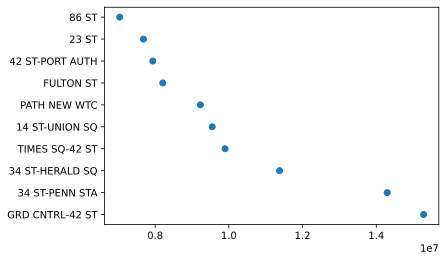

In [83]:
plt.scatter(Top_10_station['DAILY_EXITS'], Top_10_station['STATION']);

(array([290.,  51.,  16.,   8.,   3.,   3.,   3.,   1.,   0.,   2.]),
 array([       0. ,  1528463.4,  3056926.8,  4585390.2,  6113853.6,
         7642317. ,  9170780.4, 10699243.8, 12227707.2, 13756170.6,
        15284634. ]),
 <BarContainer object of 10 artists>)

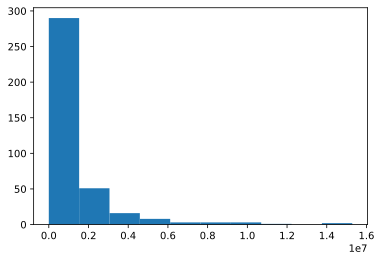

In [84]:
plt.hist(station_totals_EXIT['DAILY_EXITS']);

In [85]:
top10_stations_EXITS= (station_daily_EXITS.groupby(['STATION'])['DAILY_EXITS'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_EXITS',ascending=False) 
                   .STATION.head(10))

In [86]:
station_daily_top10_EXITS = station_daily_EXITS[station_daily_EXITS['STATION']
                                    .isin(top10_stations_EXITS)].sort_values(by = 'DAILY_EXITS', ascending = False)

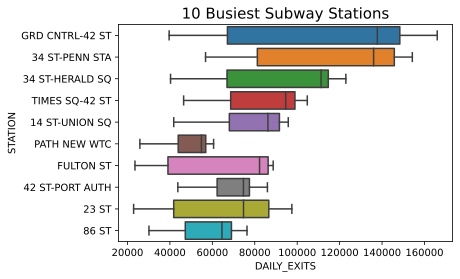

In [87]:
sns.boxplot(x='DAILY_EXITS', y='STATION', data=station_daily_top10_EXITS, order = top10_stations_EXITS, \
            showfliers = False).set_title('10 Busiest Subway Stations', size = 15);

# ENTRIES & EXITS

In [88]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00


In [89]:
turnstiles_daily_ENTRIES.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/02/2018,6604584,05/01/2018,6603075.0,1509.0
2,A002,R051,02-00-00,59 ST,05/03/2018,6606085,05/02/2018,6604584.0,1501.0
3,A002,R051,02-00-00,59 ST,05/04/2018,6607606,05/03/2018,6606085.0,1521.0
4,A002,R051,02-00-00,59 ST,05/05/2018,6608439,05/04/2018,6607606.0,833.0
5,A002,R051,02-00-00,59 ST,05/06/2018,6609035,05/05/2018,6608439.0,596.0


In [90]:
turnstiles_daily_EXITS.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,05/02/2018,2237940,05/01/2018,2237383.0,557.0
2,A002,R051,02-00-00,59 ST,05/03/2018,2238518,05/02/2018,2237940.0,578.0
3,A002,R051,02-00-00,59 ST,05/04/2018,2239018,05/03/2018,2238518.0,500.0
4,A002,R051,02-00-00,59 ST,05/05/2018,2239267,05/04/2018,2239018.0,249.0
5,A002,R051,02-00-00,59 ST,05/06/2018,2239453,05/05/2018,2239267.0,186.0


In [91]:
turnstiles_df2['DAILY_EXITS']=turnstiles_daily_EXITS['DAILY_EXITS']

In [92]:
turnstiles_df2['DAILY_ENTRIES']=turnstiles_daily_ENTRIES['DAILY_ENTRIES']

In [93]:
turnstiles_df2['TRAFFIC'] = turnstiles_df2['DAILY_ENTRIES'] + turnstiles_df2['DAILY_EXITS']


In [94]:
turnstiles_df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,EXITS,DATE_TIME,DAILY_EXITS,DAILY_ENTRIES,TRAFFIC
197379,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,21:00:00,5554,348,2018-08-24 21:00:00,432.0,2116.0,2548.0
197378,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,17:00:00,5554,348,2018-08-24 17:00:00,533.0,2683.0,3216.0
197377,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,13:00:00,5554,348,2018-08-24 13:00:00,555.0,2589.0,3144.0
197376,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,09:00:00,5554,348,2018-08-24 09:00:00,562.0,2642.0,3204.0
197375,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/24/2018,05:00:00,5554,348,2018-08-24 05:00:00,522.0,2563.0,3085.0


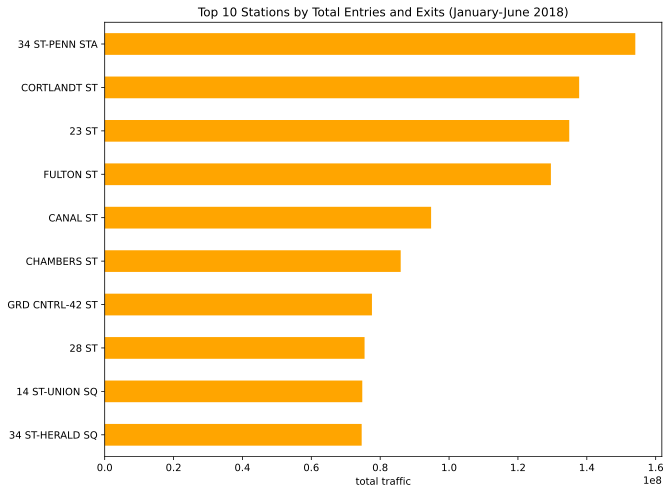

In [95]:
top_10 =turnstiles_df2.groupby(['STATION']).agg({'TRAFFIC': sum}).sort_values(by = 'TRAFFIC', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(10, 8))
top_10.sort_values(by = 'TRAFFIC',ascending=True).plot(kind='barh', color ='orange',ax=ax)
ax.set(title='Top 10 Stations by Total Entries and Exits (January-June 2018)', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

plt.scatter(turnstiles_df2['DAILY_ENTRIES'] ,turnstiles_df2['DAILY_EXITS']);

# line-chart
DAILY_EXITS=turnstiles_daily_EXITS['DAILY_EXITS']
#DAILY_ENTRIES=turnstiles_daily_ENTRIES['DAILY_ENTRIES']
#plt.plot(DAILY_EXITS);
#plt.plot(top10_stations_EXITS)

plt.bar(top10_stations_EXITS,DAILY_EXITS)

#plt.plot(station_daily_top10_EXITS)
#plt.title('Serif Title',family='serif',fontsize = 30,loc='left',color='r');
#plt.xlabel('Label on the X axis')
#plt.ylabel('Label on the Y axis',fontsize = 20, weight = 'bold',color='green');

# station_totals = top_10.groupby(['STATION']).agg({'TRAFFIC': sum}).sort_values(by = 'TRAFFIC', ascending = False)
station_totals.head(10)

In [96]:
turnstiles_df2['DAY_OF_WEEK'] = turnstiles_df2['DATE_TIME'].apply(lambda x : x.weekday())

In [ ]:
col_order=['Mon','Tues','Weds','Thurs','Fri']
pivot_df2 = turnstiles_df2[turnstiles_df2.STATION.isin(turnstiles_df2)].pivot(index='STATION', 
                                          columns='DAY_OF_WEEK', 
                                          values='TRAFFIC').reindex(col_order, axis=1).reindex(turnstiles_df2, axis=0)


f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(pivot_df2, annot=False, linewidths=.5, ax=ax, cmap="YlOrBr", square=True)
plt.title('Weekday Heatmap')
plt.xlabel('Day of Week')
plt.ylabel('Station');

C:\Users\user-id\anaconda3\lib\site-packages\seaborn\matrix.py:194: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\user-id\anaconda3\lib\site-packages\seaborn\matrix.py:199: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


# Add data set to DB

In [ ]:
engine=create_engine("sqlite://",echo=False) 
turnstiles_df.to_sql("mtaps",con=engine)

In [ ]:
turnstiles_df=pd.read_sql('select * from mtaps limit 10;',engine) 
turnstiles_df